In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('bank-full.csv',sep=';')

In [3]:
row = df.shape[0]
col = df.shape[1]
df.shape

(45211, 17)

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


age: (numeric)

job: type of job (categorical)


marital: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)


education: (categorical)


default: has credit in default? (categorical: 'no','yes','unknown')


housing: has housing loan? (categorical: 'no','yes','unknown')


loan: has personal loan? (categorical: 'no','yes','unknown')


balance: deposit amount (numeric)


contact: contact communication type (categorical: 'cellular','telephone')


month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')




day: last contact day (numeric)


duration: last contact duration, in seconds (numeric)

campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)


pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric)


previous: number of contacts performed before this campaign and for this client (numeric)


poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

deposit: has the client subscribed a term deposit? (binary: 'yes','no')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


There are no nulls values


In [6]:
df.describe()


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
df['month'] = pd.to_datetime(df['month'], format='%b').dt.month
df['month'].value_counts().index

Int64Index([5, 7, 8, 6, 11, 4, 2, 1, 10, 9, 3, 12], dtype='int64')

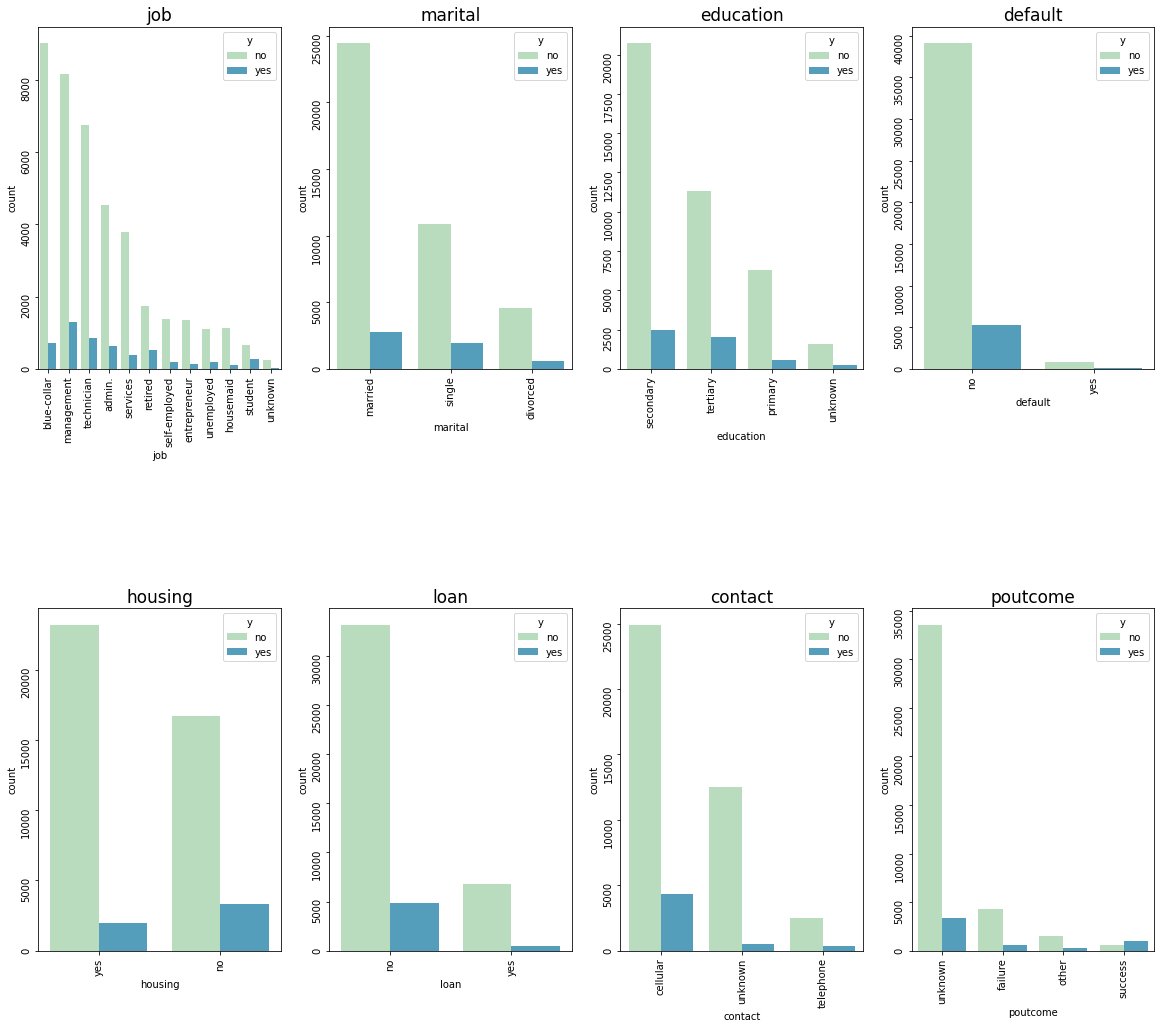

In [21]:
fig, ax = plt.subplots(2,4, figsize=(20,17))
cat = df.select_dtypes('object').columns.to_list()
cat = cat[:-1]

ax = ax.ravel()
position = 0

for i in cat:
    
    order = df[i].value_counts().index
    sns.countplot(data=df, x=i, ax=ax[position], hue='y', palette='GnBu', order=order)
    ax[position].tick_params(labelrotation=90)
    ax[position].set_title(i, fontdict={'fontsize':17})
    
    position += 1

plt.subplots_adjust(hspace=0.7)

plt.show()


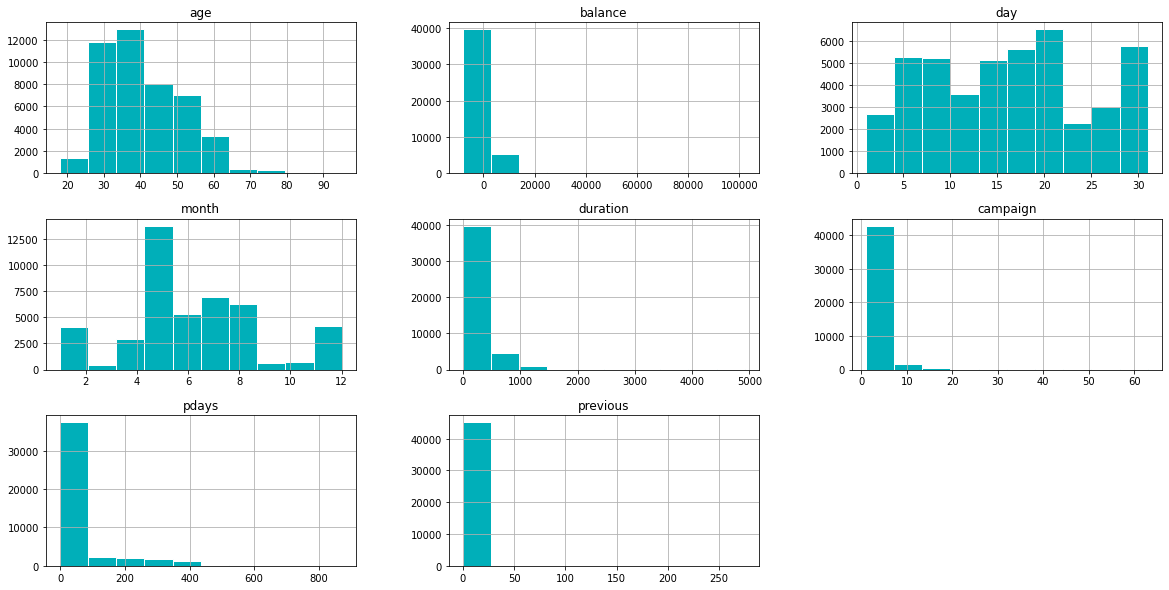

In [23]:
df.hist(figsize=(20,10), edgecolor='white', color='#00afb9')
plt.show()



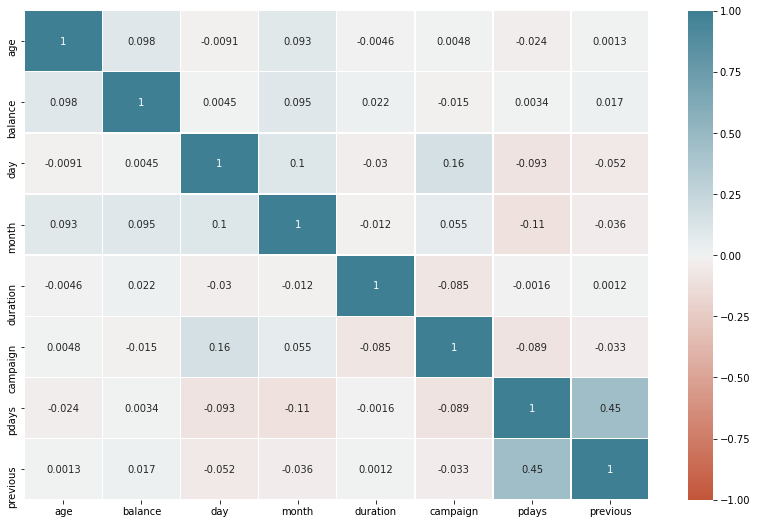

In [25]:
numbers = df.select_dtypes(['int64', 'float64']).columns.to_list()
fig, ax = plt.subplots(figsize=(14,9))
sns.heatmap(df[numbers].corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), annot=True, linewidths=.5)
plt.show()